In [25]:
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np

In [26]:
import os
import pandas as pd
os.getcwd()

path = "c:\\Users\\esthelle.kuissu\\OneDrive - Exiom Partners\\Documents\\Code_rapport_stage\\Bases sinistres"


In [27]:
import pandas as pd

# 📥 Chargement des deux bases
df_proba = pd.read_csv(path +  "\\base_predictions_sinistres_complete.csv", sep=";", encoding="utf-8")
df_bdd = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")


# 🔗 Jointure sur 'cle_sin'
df_fusion = df_bdd.merge(
    df_proba[["cle_sin", "sinistre_id_reel", "proba_sinistre_0", "proba_sinistre_1"]],
    on="cle_sin",
    how="left"  # ← garde tous les individus de la bdd principale
)

# 💾 Sauvegarde de la base enrichie
df_fusion.to_csv(path + "\\base_sinistres_enrichie.csv", sep=";", encoding="utf8", index=False)
print("✅ Base fusionnée enregistrée sous : base_sinistres_enrichie.csv")

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_22068\1501822706.py:5: DtypeWarning: Columns (24,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bdd = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")


✅ Base fusionnée enregistrée sous : base_sinistres_enrichie.csv


In [30]:
# 📦 Liste des variables à supprimer
vars_to_drop = [
    "date_evt", "date_evt_decla", "date_nais", "age", "date_permis", "anc_permis", "Region"
    "profess", "sitfam", "orig_attest", "date_sortie_veh", "age_veh", "usage2",
    "garag", "marq", "modele2", "modele_desc", "caros", "segment", "energ", "num_sra", "bureau_ratt", "fract_paiem_soc", 
    "MT_FRANCHISE", "MT_CHARGE_BRUTE", "MT_CHARGE_NETTE", "MT_REGLEMENT_SIN", "MT_REGLEMENT_COM", "MT_ABANDON_RECOURS",
    "MT_FRAIS_HONO", "MT_PROVISIONS", "MT_RECOURS_TOTAL", "MT_ESTIMATION_RECOURS_RESTANTS", "MT_AVANCE_RECOURS",
    "MT_AVANCE_RECOURS_RECOURUS", "MT_PAIEMENTS", "MT_CHARGE_BRUTE_ECO", "T_CHARGE_NETTE_ECO", "ZN_NO_RAPPORT_EXPTIS",
    "MT_VAL_REMPL_VEH_TTC", "NB_REP", "MT_REMISE", "MT_FORFAIT", "MT_FORFAIT_ERD", "LIB_CHOC", "LIB_INTENS",
    "veh_info_manquante", "_RESEAU_",
    "date_ord", "date_sortie_veh_imputee", "annee_sortie_veh"
]

# 🧹 Suppression des colonnes
df_cleaned = df_fusion.drop(columns=vars_to_drop, errors="ignore")

# 💾 Sauvegarde de la version nettoyée
df_cleaned.to_csv(path + "base_sinistres_nettoyee.csv", index=False)
print("✅ Base nettoyée enregistrée sous : base_sinistres_nettoyee.csv")

✅ Base nettoyée enregistrée sous : base_sinistres_nettoyee.csv


In [31]:
# 🔍 Liste des variables explicatives (exclure la cible et les colonnes techniques)
exclude_cols = ["MT_TOTAL_REPARABLE", "MT_MO_REPARABLE", "MT_IP_REPARABLE",  "MT_PIECES_REPARABLE", "sinistre_id_reel", "cle_sin", "proba_sinistre_0", "proba_sinistre_1"]
variables = [col for col in df_cleaned.columns if col not in exclude_cols]

# 🧠 Construction de la formule GLM
formula_glm = "MT_TOTAL_REPARABLE ~ " + " + ".join(variables)
print("📋 Formule GLM utilisée :")
print(formula_glm)

📋 Formule GLM utilisée :
MT_TOTAL_REPARABLE ~ clos + sans_suite + quart_resp + date_premsous + date_dernrempl + formule_ratt + cond_indet + sexe + profess + aac + franch + rachat_francBG + generation + cylin + pdyne + pkw + pfisc + vites + pvid + poidspuiss + sport + frein + cdval + trans + alim + suspe + boite + val + couple + airbag + crash + co2min + elt_secu + vu + pickup + luxe + prestige + soumis_crm + crm + boncond + nab50 + formule_gar + petit_rouleur + systeme + exercice + GARANTIE_HOST + MT_CHARGE_NETTE_ECO + NBHH_MO_REPARABLE + TAUX_HORAIRE_MO + NBHH_IP_REPARABLE + NB_PIECES_REEMPLOI + MT_PIECES_REEMPLOI + RE_AVEC_PIECE_REEMPLOI + RE_AVEC_PIECE_REPAR_MP + RE_AVEC_PIECE_REMPL_MP + GARAGE_AGREE_O_N + DPT_REP + NB_PIECE_REMPLACEE + NB_PIECE_REPAREE + date_nais_f + date_permis_f + formule_ratt_g + sitfam_g + usage2_g + orig_attest_g + caros_g + segment_g + energ_g + frein_g + alim_g + suspe_g + crash_g + fract_paiem_soc_g + cdval_g + modele2_g + profess_g + marq_g + garag_g + Re

In [ ]:
! pip install statsmodels

In [32]:
import statsmodels.api as sm

In [33]:
import statsmodels.formula.api as smf

# Sélection de variables

In [34]:
# Déterminer les variables qualitatives et quantitatives
quali_vars = df_cleaned.select_dtypes(include=['object']).columns.tolist()
quanti_vars = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables qualitatives :", quali_vars)
print("Variables quantitatives :", quanti_vars)

Variables qualitatives : ['cle_sin', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'sexe', 'profess', 'aac', 'franch', 'rachat_francBG', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'crash', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'formule_gar', 'petit_rouleur', 'systeme', 'GARANTIE_HOST', 'GARAGE_AGREE_O_N', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'Zone']
Variables quantitatives : ['generation', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'val', 'couple', 'airbag', 'co2min', 'crm', 'boncond', 'nab50', 'exercice', 'MT_CHARGE_NETTE_ECO', 'MT_TOTAL_REPARABLE', 'MT_MO_REPARABLE', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'MT_IP_REPARABLE', 'NBHH_IP_REPARABLE', 'MT

In [35]:
quanti_vars = [col for col in quanti_vars if col not in ['MT_CHARGE_NETTE_ECO', 'MT_MO_REPARABLE', 'MT_IP_REPARABLE', 'proba_sinistre_0', 'proba_sinistre_1']]
quali_vars = [col for col in quanti_vars if col != 'cle_sin']


## Analyse des corrélations des variables quantitatives avec la variable cible

In [36]:
import pandas as pd

# Supposons que df est déjà défini
target_variable = 'MT_TOTAL_REPARABLE'

# Sélectionner les variables numériques
quanti_df = df_cleaned.select_dtypes(include='number')

# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'MT_CHARGE_NETTE_ECO',
    'MT_MO_REPARABLE',
    'MT_IP_REPARABLE',
    'proba_sinistre_0',
    'proba_sinistre_1'
]

# Supprimer les colonnes du DataFrame
quanti_df = quanti_df.drop(columns=colonnes_a_supprimer, errors='ignore')

# Vérifier que la variable cible est bien dans les colonnes
if target_variable not in quanti_df.columns:
    raise ValueError(f"La variable cible '{target_variable}' n'est pas numérique ou absente du DataFrame.")

# Calculer les corrélations avec la variable cible
correlations = quanti_df.corr()[target_variable].drop(target_variable)

# Afficher les résultats triés par ordre décroissant de corrélation
print("Corrélations avec la variable cible MT_TOTAL_REPARABLE :")
print(correlations.sort_values(ascending=False))

Corrélations avec la variable cible MT_TOTAL_REPARABLE :
MT_PIECES_REPARABLE       0.855995
NBHH_MO_REPARABLE         0.706523
NB_PIECE_REMPLACEE        0.682235
NBHH_IP_REPARABLE         0.536654
NB_PIECE_REPAREE          0.365289
RE_AVEC_PIECE_REMPL_MP    0.257191
TAUX_HORAIRE_MO           0.200148
sinistre_id_reel          0.170187
val                       0.149040
pkw                       0.130298
pdyne                     0.130294
pfisc                     0.114634
vites                     0.112541
couple                    0.103071
pvid                      0.097245
exercice                  0.096789
cylin                     0.089234
MT_PIECES_REEMPLOI        0.088341
boncond                   0.082707
crm                       0.071197
NB_PIECES_REEMPLOI        0.052577
airbag                    0.030663
RE_AVEC_PIECE_REEMPLOI    0.027972
generation                0.025455
DPT_REP                   0.003987
co2min                   -0.006425
poidspuiss               -0.05878

In [37]:
import scipy.stats as stats
import pandas as pd


# Liste des variables cibles
variables_cibles = ['MT_TOTAL_REPARABLE']

# Initialisation d'un DataFrame pour stocker les p-values
results = []

# Boucler sur chaque variable qualitative
for var_qualitative in quali_vars:
    if df_cleaned[var_qualitative].nunique() < 10:  # Vérification du nombre de modalités
        for var_cible in variables_cibles:
            if var_cible in df_cleaned.columns:
                # Création des groupes pour l'ANOVA
                groupes = [df_cleaned[df_cleaned[var_qualitative] == cat][var_cible] for cat in df_cleaned[var_qualitative].unique()]
                
                # Vérifier que chaque groupe a au moins une valeur
                if all(len(groupe) > 1 for groupe in groupes):
                    anova_result = stats.f_oneway(*groupes)
                    
                    # Stocker les résultats
                    results.append({'Variable Cible': var_cible, 'Variable Qualitative': var_qualitative, 'p-value': anova_result.pvalue})
                    
                    # Affichage des résultats
                    print(f"\nANOVA pour {var_cible} en fonction de {var_qualitative}:")
                    print(f"F-statistique : {anova_result.statistic:.3f}, p-value : {anova_result.pvalue:.3f}")
                    
                    if anova_result.pvalue < 0.05:
                        print("→ La variable qualitative semble avoir un impact significatif !")
                    else:
                        print("→ Pas de corrélation statistiquement significative.")
                else:
                    print(f"→ Problème avec la distribution des groupes pour {var_cible}.")
            else:
                print(f"→ La variable cible {var_cible} n'est pas présente dans le DataFrame.")

# Conversion des résultats en DataFrame pour analyse
df_results = pd.DataFrame(results)

# Affichage final des résultats significatifs
print("\n### Résumé des p-values ###")
print(df_results)


ANOVA pour MT_TOTAL_REPARABLE en fonction de exercice:
F-statistique : 1937.993, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_TOTAL_REPARABLE en fonction de RE_AVEC_PIECE_REEMPLOI:
F-statistique : 784.482, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_TOTAL_REPARABLE en fonction de RE_AVEC_PIECE_REPAR_MP:
F-statistique : 4051.642, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_TOTAL_REPARABLE en fonction de RE_AVEC_PIECE_REMPL_MP:
F-statistique : 70963.202, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_TOTAL_REPARABLE en fonction de sinistre_id_reel:
F-statistique : 29882.492, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

### Résumé des p-values ###
       Variable Cible    Variable Qualitative        p-value
0  MT_TOTAL_REPARABLE                exercice   0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

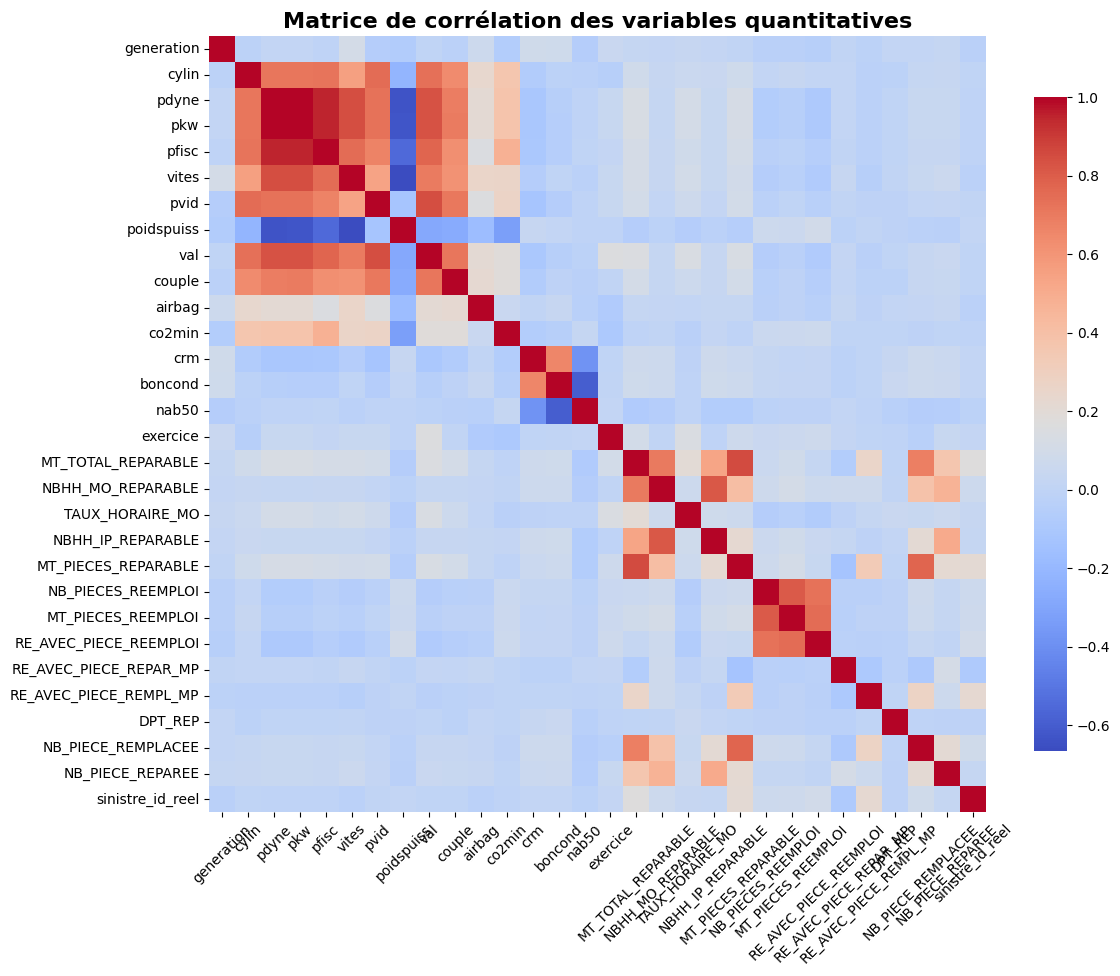

In [38]:
corr_matrix = df_cleaned[quanti_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation des variables quantitatives', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [39]:
# Calculer la matrice de corrélation
corr_matrix = df_cleaned[quanti_vars].corr()

# Sélectionner les paires de variables avec |corr| >= 0.5
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Supprimer les auto-corrélations (corrélation d'une variable avec elle-même)
corr_pairs = corr_pairs[corr_pairs < 1]

# Filtrer les valeurs supérieures ou égales à 0.5
strong_corr_pairs = corr_pairs[corr_pairs >= 0.5]

# Affichage des résultats
print(strong_corr_pairs)


pkw                 pdyne                 0.999968
pdyne               pkw                   0.999968
                    pfisc                 0.952911
pfisc               pdyne                 0.952911
                    pkw                   0.952753
                                            ...   
vites               pvid                  0.538702
NBHH_IP_REPARABLE   MT_TOTAL_REPARABLE    0.536654
MT_TOTAL_REPARABLE  NBHH_IP_REPARABLE     0.536654
NBHH_IP_REPARABLE   NB_PIECE_REPAREE      0.506273
NB_PIECE_REPAREE    NBHH_IP_REPARABLE     0.506273
Length: 88, dtype: float64


## Quali

In [ ]:
# Code pour filtrer les corrélations fortes (≥ 0.4)
import pandas as pd
import numpy as np
import scipy.stats as ss

# Fonction pour calculer le coefficient de Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Table de contingence
    chi2 = ss.chi2_contingency(contingency_table)[0]  # Calcul du Chi²
    n = contingency_table.sum().sum()  # Nombre total d'observations
    k = min(contingency_table.shape)  # Taille minimale de la table
    return np.sqrt(chi2 / (n * (k - 1)))  # Formule de Cramér V


# Calculer la matrice de corrélation Cramér V
cramer_matrix = pd.DataFrame(index=quali_vars, columns=quali_vars, dtype=np.float32)

for var1 in quali_vars:
    for var2 in quali_vars:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1  # Corrélation parfaite avec soi-même
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(df_cleaned[var1], df_cleaned[var2])

# Convertir en float pour l'affichage
cramer_matrix = cramer_matrix.astype(float)

# 🔍 Extraire les paires avec Cramér V ≥ 0.4
corr_pairs = cramer_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Supprimer les auto-corrélations
strong_corr_pairs = corr_pairs[corr_pairs >= 0.4]  # Filtrer les valeurs fortes

# Affichage des résultats
print("🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :")
print(strong_corr_pairs)

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_22068\1781531628.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.34012123649699794' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(df_cleaned[var1], df_cleaned[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_22068\1781531628.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3131082557929385' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(df_cleaned[var1], df_cleaned[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_22068\1781531628.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

## Modele

In [10]:
# 📊 GLM pour sinistres de type 1
df_type_1 = df_cleaned[df_cleaned["sinistre_id_reel"] == 1]
glm_1 = smf.glm(
    formula=formula_glm,
    data=df_type_1,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


MemoryError: Unable to allocate 370. GiB for an array with shape (890530, 55785) and data type float64

In [ ]:
# 📊 GLM pour sinistres de type 0
df_type_0 = df_cleaned[df_cleaned["sinistre_id_reel"] == 0]
glm_0 = smf.glm(
    formula=formula_glm,
    data=df_type_0,
    family=sm.families.Gamma(sm.families.links.log())
).fit()


# STOP ICI

In [58]:
Y1 = dataM['MT_MO_REPARABLE']

In [59]:
X1 = dataM[['pkw', 'age_veh', 'val', 'generation', 'airbag', 'co2min', 'anc_permis',
       'cylin', 'poidspuiss', 'crm', 'nab50','NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO']]

In [60]:
print(X1.dtypes)


pkw                  float64
age_veh              float64
val                  float64
generation           float64
airbag               float64
co2min               float64
anc_permis           float64
cylin                float64
poidspuiss           float64
crm                  float64
nab50                float64
NBHH_MO_REPARABLE    float64
TAUX_HORAIRE_MO      float64
dtype: object


In [61]:
#!pip install pyglmnet
!pip install scipy
from pyglmnet import GLM
from scipy import stats

In [62]:
from pyglmnet import GLM
model = GLM(distr='gamma', alpha=1, reg_lambda=0.01)
import numpy as np

In [63]:
X1 = X1.to_numpy()  # Convertir DataFrame en ndarray
Y1 = Y1.to_numpy()  # Convertir Series en ndarray


In [64]:
model.fit(X1, Y1)  # Réessayer l'ajustement du modèle


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\pyglmnet\pyglmnet.py:92: RuntimeWarning: overflow encountered in exp
  mu = np.log1p(np.exp(z))
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\pyglmnet\pyglmnet.py:863: UserWarning: Reached max number of iterations without convergence.
  warnings.warn(


<
Distribution | gamma
alpha | 1.00
max_iter | 1000.00
lambda: 0.01
>

In [65]:
# Predicting the response variable using the fitted model
Y_pred = model.predict(X1)

In [66]:
dataM['Y_pred'] = Y_pred  # Ajouter les prédictions au DataFrame original
# Calculer les résidus 
dataM['residuals'] = dataM['MT_MO_REPARABLE'] - dataM['Y_pred']
# Afficher les 5 premières lignes du DataFrame avec les prédictions et les résidus
print(dataM[['MT_MO_REPARABLE', 'Y_pred', 'residuals']].head(10))


   MT_MO_REPARABLE      Y_pred   residuals
0          598.300         inf        -inf
1           65.000         inf        -inf
2           70.000         inf        -inf
3          227.500  517.094524 -289.594524
4          550.025  677.437458 -127.412458
5          488.025  572.001228  -83.976228
6         1237.000         inf        -inf
7          108.340         inf        -inf
8           62.400         inf        -inf
9          133.000         inf        -inf


In [ ]:
!pip install pyglmnet



In [13]:
!pip install distutils

ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [18]:
pip install setuptools

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade setuptools


Note: you may need to restart the kernel to use updated packages.


In [21]:
from setuptools import setup
